# Advanced Lane Finding Project

The goals / steps of this project are the following:

- **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
- **Apply a distortion correction to raw images.**
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

# Camera calibration

In [1]:
import pickle
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Load calibration images.
Images = glob.glob('./camera_cal/calibration*.jpg')

In [15]:
objpoints=[] # 3D points in real world
imgpoints=[] # 2D points in image plane

objp=np.zeros((6*9,3),np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)


# #print(objp)
error=0
images=[]
for fname in Images:
    img=mpimg.imread(fname)

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ret,corners=cv2.findChessboardCorners(gray,(9,6),None)

    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)
        images.append(img)
        #img=cv2.drawChessboardCorners(img,(8,6),corners,ret)
        #plt.imshow(img)
    else:
        print('failed to find chess corners: '+str(fname))



failed to find chess corners: ./camera_cal/calibration4.jpg
failed to find chess corners: ./camera_cal/calibration5.jpg
failed to find chess corners: ./camera_cal/calibration1.jpg


In [4]:
print(str(len(images))+' pictures are available')

17 pictures are available


Text(0.5,1,'With points')

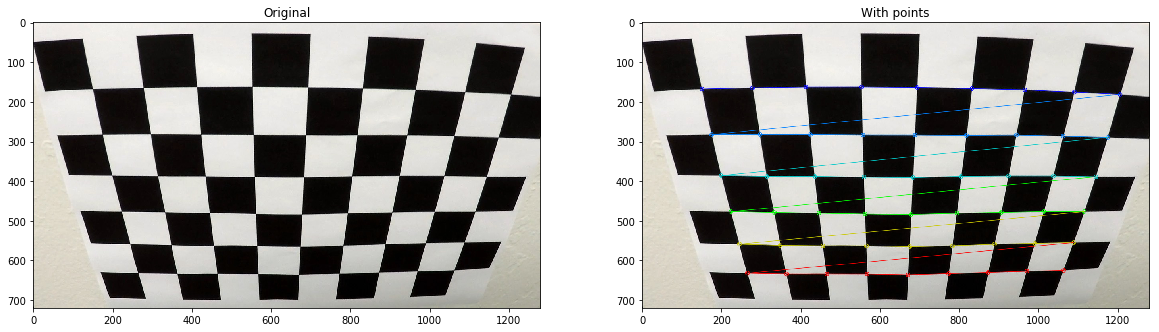

In [35]:
#test
num=16
img_test=images[num]
img=img_test.copy()
cv2.drawChessboardCorners(img,(9,6),imgpoints[num],ret)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(img_test)
axes[0].set_title('Original')
axes[1].imshow(img)
axes[1].set_title('With points')

In [37]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_test.shape[0:2], None, None)

In [38]:
undist = cv2.undistort(img_test, mtx, dist, None, mtx)

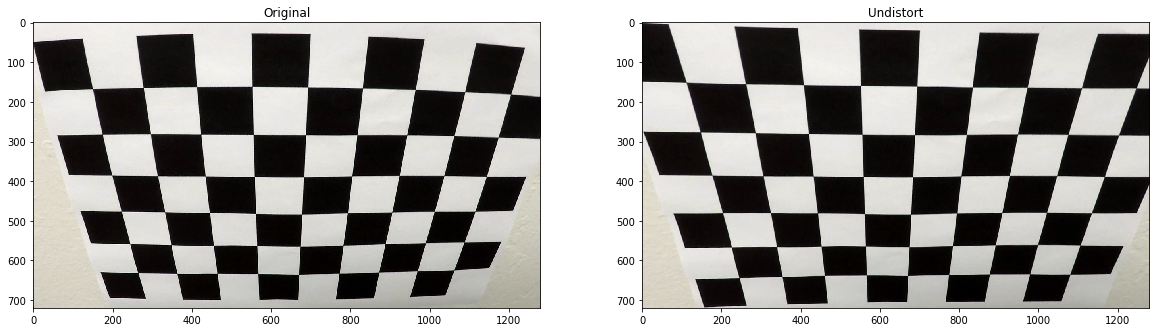

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(img_test)
axes[0].set_title('Original')
axes[1].imshow(undist)
axes[1].set_title('Undistort')

plt.savefig('./output_images/undistort_output.jpg')

In [9]:
#output dist and mtx
import pickle
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('./Pickled_data/camera_calibration.p', 'wb'))

In [47]:
#car driving undistorted picture test

img_car=mpimg.imread('./test_images/test1.jpg')

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_car.shape[0:2], None, None)
undist = cv2.undistort(img_car, mtx, dist, None, mtx)


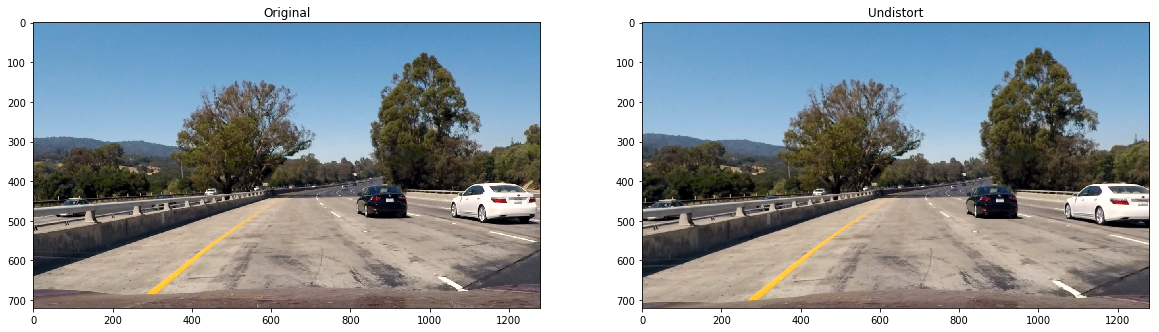

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(img_car)
axes[0].set_title('Original')
axes[1].imshow(undist)
axes[1].set_title('Undistort')
plt.savefig('./output_images/car_undistort.jpg')